In [302]:
import pandas as pd
from shapely.geometry import Point, Polygon,LineString
import matplotlib.pyplot as plt
import geopandas as gpd 
import numpy as np
import json


In [303]:
arr = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/arrondissementsParis.csv", sep=",")
cpt_traffic = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/comptage_Traffic.csv", sep=";")
cpt_velo = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/comptage_Velo.csv", sep=",")
carb = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/Prix_carburant2022Paris.csv", sep=";")

In [304]:
df_arr=arr.copy()
df_arr["X"]=df_arr["X"].str.replace(",", ".")
df_arr["Y"]=df_arr["Y"].str.replace(",", ".")

all_geo = [json.loads(str(item))['coordinates'][0] for item in df_arr["Geometry"]]
df_arr["geo_shape_list"] = all_geo
df_arr["geo_shape_list"] = df_arr["geo_shape_list"].apply(Polygon)
df_arr = gpd.GeoDataFrame(df_arr, geometry = df_arr["geo_shape_list"], crs="EPSG:4326")
df_arr["ville"] = "Paris"
df_arr = df_arr[["id_arr", "ville", "Numéro d’arrondissement INSEE", "Numéro d’arrondissement","Numéro d’arrondissement INSEE", "Nom officiel de l’arrondissement", "Surface", "X", "Y", "geometry"]].rename(columns={"Numéro d’arrondissement": "num_arr", "Numéro d’arrondissement INSEE": "code_insee", "Nom officiel de l’arrondissement" : "nom_arr", "Surface":"surfce_arr", "X":"lat", "Y":"lon"})

df_arr.to_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/DW/Tables/arrondissement.csv", index=F)

,id_arr,ville,code_insee,num_arr,code_insee,nom_arr,surfce_arr,lat,lon,geometry
0,1,Paris,75105,5,75105,Panthéon,2.539375e+06,48.844443150532726,2.3507146095752596,"POLYGON ((2.36443 48.84614, 2.36484 48.84584, ..."
1,2,Paris,75108,8,75108,Élysée,3.880036e+06,48.872720837434514,2.312554022402064,"POLYGON ((2.32584 48.86956, 2.32569 48.86954, ..."
2,3,Paris,75115,15,75115,Vaugirard,8.494994e+06,48.8400853759382,2.292825822424997,"POLYGON ((2.29932 48.85217, 2.30088 48.85118, ..."
3,4,Paris,75107,7,75107,Palais-Bourbon,4.090057e+06,48.85617442877936,2.3121876914820114,"POLYGON ((2.32090 48.86306, 2.32094 48.86305, ..."
4,5,Paris,75113,13,75113,Gobelins,7.149311e+06,48.82838803174471,2.362272440420904,"POLYGON ((2.37491 48.83801, 2.37698 48.83610, ..."
5,6,Paris,75114,14,75114,Observatoire,5.614877e+06,48.82924450048985,2.3265420441989484,"POLYGON ((2.33381 48.84061, 2.33673 48.83965, ..."
6,7,Paris,75111,11,75111,Popincourt,3.665442e+06,48.85905922134248,2.3800583081978988,"POLYGON ((2.39624 48.85415, 2.39708 48.85308, ..."
7,8,Paris,75101,1,75101,Louvre,1.824613e+06,48.86256270183607,2.3364433620533878,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
8,9,Paris,75109,9,75109,Opéra,2.178303e+06,48.877163517328796,2.337457543482544,"POLYGON ((2.33978 48.88203, 2.33982 48.88202, ..."
9,10,Paris,75104,4,75104,Hôtel-de-Ville,1.600586e+06,48.854341426272825,2.3576296203249942,"POLYGON ((2.36851 48.85573, 2.36900 48.85374, ..."


In [305]:
df_traff = cpt_traffic.copy()
df_traff = df_traff[["Identifiant arc","lat","long","geo_shape"]]
df_traff=df_traff.drop_duplicates().reset_index(drop=True)
df_traff=df_traff[df_traff['geo_shape'].notna()].reset_index(drop=True)

all_geo = [json.loads(str(item))['coordinates'] for item in df_traff["geo_shape"]]
df_traff["geo_shape_list"] = all_geo
df_traff["geo_shape_list"] = df_traff["geo_shape_list"].apply(LineString)

df_traff = gpd.GeoDataFrame(df_traff, geometry = df_traff["geo_shape_list"], crs="EPSG:4326")
df_traff["type_install"]="cpt_traffic"
df_traff = df_traff[["Identifiant arc", "type_install", "lat", "long", "geometry"]].rename(columns={"Identifiant arc":"id_type_install", "long":"lon"})
len(df_traff)

3484

In [306]:
df_cpt_velo = cpt_velo.copy()
df_cpt_velo = df_cpt_velo[["Identifiant du compteur","Nom du site de comptage","Coordonnées géographiques"]]
df_cpt_velo=df_cpt_velo.drop_duplicates()
df_cpt_velo[['lat','lon']] = df_cpt_velo["Coordonnées géographiques"].str.split(",",expand=True)
df_cpt_velo = gpd.GeoDataFrame(df_cpt_velo, geometry = gpd.points_from_xy(df_cpt_velo["lon"], df_cpt_velo["lat"]), crs="EPSG:4326")
df_cpt_velo["type_install"]="cpt_velo"
df_cpt_velo = df_cpt_velo[["Identifiant du compteur", "type_install", "lat", "lon", "geometry"]].rename(columns={"Identifiant du compteur":"id_type_install"})
len(df_cpt_velo)

99

In [307]:
df_carburant = carb.copy()
df_carburant = df_carburant[["id_station","latitude","longitude","adresse","cp"]]
df_carburant=df_carburant.drop_duplicates()
df_carburant["latitude"] = df_carburant["latitude"]/100000
df_carburant["longitude"] = df_carburant["longitude"]/100000
df_carburant = gpd.GeoDataFrame(df_carburant, geometry = gpd.points_from_xy(df_carburant["longitude"], df_carburant["latitude"]), crs="EPSG:4326")
df_carburant["type_install"]="station_carburant"
df_carburant = df_carburant[["id_station", "type_install", "latitude", "longitude", "geometry"]].rename(columns={"id_station":"id_type_install", "longitude":"lon", "latitude":"lat"})
len(df_carburant)

48

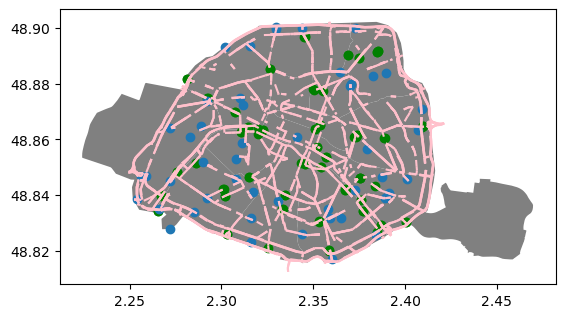

In [308]:
arr_ = df_arr["geometry"]
traff_ = df_traff["geometry"]
velo_ = df_cpt_velo["geometry"]
carb_ = df_carburant["geometry"]

p_arr = gpd.GeoSeries(arr_)
p_traff = gpd.GeoSeries(traff_)
p_velo = gpd.GeoSeries(velo_)
p_carb = gpd.GeoSeries(carb_)

fig, ax = plt.subplots()
p_arr.plot(ax=ax, color="grey")
p_traff.plot(ax = ax, color="pink")
p_velo.plot(ax = ax, color="green")
p_carb.plot(ax = ax)

plt.show()

In [309]:
position = pd.concat([df_traff, df_cpt_velo, df_carburant]).reset_index(drop=True).reset_index().rename(columns={"index":"id_pos"})
position 

,id_pos,id_type_install,type_install,lat,lon,geometry
0,0,193,cpt_traffic,48.853584,2.329883,"LINESTRING (2.33042 48.85445, 2.32972 48.85332..."
1,1,4957,cpt_traffic,48.882568,2.370346,"LINESTRING (2.37036 48.88240, 2.37033 48.88273)"
2,2,1143,cpt_traffic,48.826172,2.299182,"LINESTRING (2.30022 48.82594, 2.29916 48.82621..."
3,3,6591,cpt_traffic,48.860503,2.313251,"LINESTRING (2.31318 48.85994, 2.31332 48.86106)"
4,4,1629,cpt_traffic,48.886012,2.349456,"LINESTRING (2.34946 48.88657, 2.34945 48.88546)"
...,...,...,...,...,...,...
3626,3626,75019015,station_carburant,48.88384,2.38977,POINT (2.38977 48.88384)
3627,3627,75019017,station_carburant,48.88001,2.37055,POINT (2.37055 48.88001)
3628,3628,75020008,station_carburant,48.863356,2.407215,POINT (2.40721 48.86336)
3629,3629,75020010,station_carburant,48.871,2.409,POINT (2.40900 48.87100)


In [319]:
position = gpd.sjoin(position, df_arr[["id_arr", "geometry"]], how = "inner", op = 'intersects').reset_index(drop=True)


C:\Users\pauli\anaconda3\envs\M2\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [324]:
position.to_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/DW/Tables/position.csv", index=False)